In [1]:
#import module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import learning_curve

## Load Data

Load the converted audio data to MFCC with three different window size: 50 ms, 100 ms, 500 ms. For Machine Learning Model input, Mean and Standard Deviation are calculated from each row

In [2]:
#Import the mfcc 50 window size mean and std data
df_ms_50 =pd.read_csv("mfcc/mfcc_50_mean_std.csv")

In [3]:
#Import the mfcc 100 window size mean and std data
df_ms_100 =pd.read_csv("mfcc/mfcc_100_mean_std.csv")

In [4]:
#Import the mfcc 500 window size mean and std data
df_ms_500 =pd.read_csv("mfcc/mfcc_500_mean_std.csv")

### Convert the label S1, S2, S3 to S so the data will have 2 classes ony, S as Snoring and N as Non Snoring

We use column with the mean values for choosing the best model with the dataset of 50ms, 100ms, and 500ms

In [5]:
#import module for scaling the data, splitting the data into train and test data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 50ms

In [6]:
df_ms_50.head()

,label,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,...,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,mfcc_13_std
0,N,-657.723148,184.714036,-43.705060,34.247470,9.993502,-5.231845,28.230855,-11.279565,2.535230,...,7.535729,7.251323,7.203077,8.026103,7.948256,7.753351,8.878212,6.848919,8.408963,8.074407
1,S1,-665.588282,197.011815,-52.304025,41.994048,8.168739,-4.828233,26.559969,-10.967839,3.062803,...,8.620096,7.440987,7.123942,6.545499,6.633028,5.638938,6.974657,5.744087,6.816978,7.252636
2,N,-666.464780,193.211455,-54.046330,34.393394,6.150563,-2.940705,26.545822,-13.316384,-2.022403,...,5.456756,7.434191,7.249657,10.193087,6.016713,5.016665,4.982917,5.292135,4.652823,7.492822
3,S1,-664.284715,198.502961,-50.262606,41.508415,8.895239,-5.102275,25.099437,-10.744751,1.498850,...,6.690414,6.668731,7.013537,8.457928,7.946687,7.079497,7.785825,8.666941,10.213938,7.036044
4,N,-665.137580,193.384087,-56.805033,37.033101,11.375366,-3.671450,22.680460,-10.320786,3.807404,...,6.837878,5.905541,7.286071,6.908670,8.042997,6.519112,5.730134,4.824089,4.979343,5.891883


In [7]:
# Create a copy of the original DataFrame
df_ms_50_2 = df_ms_50.copy()

In [8]:
# Replace 'S1', 'S2', 'S3' with 'S' in the copied DataFrame
df_ms_50_2['label'].replace(['S1', 'S2', 'S3'], 'S', inplace=True)

In [9]:
df_ms_50_2['label'].unique()

array(['N', 'S'], dtype=object)

In [10]:
#mfcc Mean columns
x_mean_50 = df_ms_50_2.iloc[:, 1:14]

In [11]:
#variable for the label
y_2_50 = df_ms_50_2.loc[:,'label']
# Convert 'N' to 0 and 'S' to 1
y_2_50 = y_2_50.map({'N': 0, 'S': 1})

In [12]:
#splitting the data into train and test data
X_mean_2_50_train, X_mean_2_50_test, y_2_50_train, y_2_50_test = train_test_split(x_mean_50, y_2_50, test_size=0.2, random_state=123)

In [13]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_mean_2_50_train_scaled = scaler.fit_transform(X_mean_2_50_train)
x_mean_2_50_test_scaled = scaler.transform(X_mean_2_50_test)

### 100ms

In [14]:
# Create a copy of the original DataFrame
df_ms_100_2 = df_ms_100.copy()

In [15]:
# Replace 'S1', 'S2', 'S3' with 'S' in the copied DataFrame
df_ms_100_2['label'].replace(['S1', 'S2', 'S3'], 'S', inplace=True)

In [16]:
df_ms_100_2['label'].unique()

array(['N', 'S'], dtype=object)

In [17]:
#mfcc Mean and Std columns
x_mean_100 = df_ms_100_2.iloc[:,1:14]

In [18]:
#variable for the label
y_2_100 = df_ms_100_2.loc[:,'label']

# Convert 'N' to 0 and 'S' to 1
y_2_100 = y_2_100.map({'N': 0, 'S': 1})

In [19]:
#splitting the data into train and test data
X_mean_2_100_train, X_mean_2_100_test, y_2_100_train, y_2_100_test = train_test_split(x_mean_100, y_2_100, test_size=0.2, random_state=123)

In [20]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_mean_2_100_train_scaled = scaler.fit_transform(X_mean_2_100_train)
x_mean_2_100_test_scaled = scaler.transform(X_mean_2_100_test)

In [21]:
x_mean_2_100_train_scaled.shape

(30713, 13)

### 500ms

In [22]:
# Create a copy of the original DataFrame
df_ms_500_2 = df_ms_500.copy()

In [23]:
# Replace 'S1', 'S2', 'S3' with 'S' in the copied DataFrame
df_ms_500_2['label'].replace(['S1', 'S2', 'S3'], 'S', inplace=True)

In [24]:
df_ms_500_2['label'].unique()

array(['N', 'S'], dtype=object)

In [25]:
#mfcc Mean and Std columns
x_mean_500 = df_ms_500_2.iloc[:,1:14]

In [26]:
#variable for the label
y_2_500 = df_ms_500_2.loc[:,'label']

# Convert 'N' to 0 and 'S' to 1
y_2_500 = y_2_500.map({'N': 0, 'S': 1})

In [27]:
#splitting the data into train and test data
X_mean_2_500_train, X_mean_2_500_test, y_2_500_train, y_2_500_test = train_test_split(x_mean_500, y_2_500, test_size=0.2, random_state=123)

In [28]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_mean_2_500_train_scaled = scaler.fit_transform(X_mean_2_500_train)
x_mean_2_500_test_scaled = scaler.transform(X_mean_2_500_test)

## Machine Learning Model

There are three models that we will perform: Logistic Regression, Linear SVM, and XGBoost
We try all different dataset as the input for those three models, then choosing the best model based on its performance report.

### Define function for learning curve plot

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


## Logistic Regression

In [30]:
#import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

### 50ms

In [31]:
#Perform Logistic Regression on the MFCC mean data
model_50_lr1=LogisticRegression(solver="lbfgs", random_state=42)
model_50_lr1.fit(x_mean_2_50_train_scaled, y_2_50_train)

LogisticRegression(random_state=42)

In [32]:
# Predict on the test set
y_pred_50_lr1 = model_50_lr1.predict(x_mean_2_50_test_scaled)

In [33]:
from sklearn.metrics import classification_report
# Evaluate the performance
print(classification_report(y_2_50_test, y_pred_50_lr1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3675
           1       0.83      0.85      0.84      4004

    accuracy                           0.83      7679
   macro avg       0.83      0.83      0.83      7679
weighted avg       0.83      0.83      0.83      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

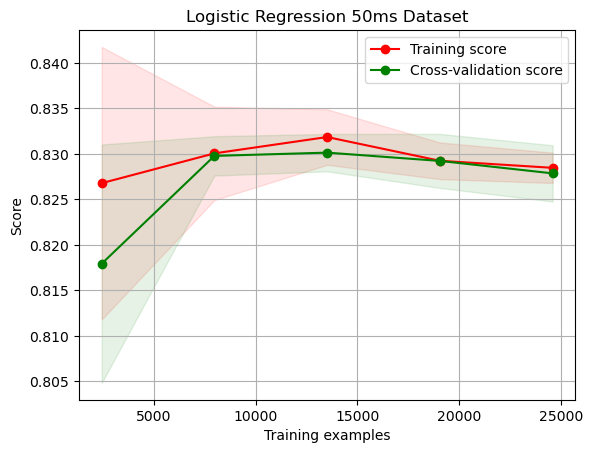

In [34]:
plot_learning_curve(model_50_lr1,"Logistic Regression 50ms Dataset",x_mean_2_50_train_scaled, y_2_50_train )

Check the feature importance coefficient from the model, then drop the columns that has small coefficient. After that, we try to perform the logistic regression again to see if it will increase the performance

In [35]:
# Get feature coefficients
feature_importance = model_50_lr1.coef_
feature_importance

array([[ 2.13385156,  0.17115353,  0.69702849, -0.01860308,  1.41273189,
        -1.47321624,  0.46033638, -2.00230837,  1.0632716 , -1.0427121 ,
         1.63501286, -0.68971566,  0.06441648]])

In [36]:
#drop the columns that have smallest coefficient
columns_to_drop = ['mfcc_2_mean', 'mfcc_9_mean']
x_mean_50_d = x_mean_50.drop(columns=columns_to_drop, axis=1)

In [37]:
#splitting the data into train and test data
X_mean_50_d_train, X_mean_50_d_test, y_2_50_train, y_2_50_test = train_test_split(x_mean_50_d, y_2_50, test_size=0.2, random_state=123)

In [38]:
#scalling the value for all features for the new data
x_mean_50_d_train_scaled = scaler.fit_transform(X_mean_50_d_train)
x_mean_50_d_test_scaled = scaler.transform(X_mean_50_d_test)

In [39]:
#Perform Logistic Regression on the MFCC mean data
model_lr2=LogisticRegression(solver="lbfgs", random_state=42)
model_lr2.fit(x_mean_50_d_train_scaled, y_2_50_train)

# Predict on the test set
y_pred_lr2 = model_lr2.predict(x_mean_50_d_test_scaled)

# Evaluate the performance
print(classification_report(y_2_50_test, y_pred_lr2))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3675
           1       0.84      0.82      0.83      4004

    accuracy                           0.82      7679
   macro avg       0.82      0.82      0.82      7679
weighted avg       0.82      0.82      0.82      7679



There is 0.01 drop in accuracy after removing the 2 features with lowest coefficient, so for the next models we include all of the features 

### 100ms

In [40]:
#splitting the data into train and test data
X_mean_2_100_train, X_mean_2_100_test, y_2_100_train, y_2_100_test = train_test_split(x_mean_100, y_2_100, test_size=0.2, random_state=123)

In [41]:
#Perform Logistic Regression on the MFCC mean data
model_100_lr=LogisticRegression(solver="lbfgs", random_state=42)
model_100_lr.fit(x_mean_2_100_train_scaled, y_2_100_train)

LogisticRegression(random_state=42)

In [42]:
# Predict on the test set
y_pred_100_lr = model_100_lr.predict(x_mean_2_100_test_scaled)

In [43]:
from sklearn.metrics import classification_report
# Evaluate the performance
print(classification_report(y_2_100_test, y_pred_100_lr))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3675
           1       0.83      0.84      0.84      4004

    accuracy                           0.83      7679
   macro avg       0.83      0.83      0.83      7679
weighted avg       0.83      0.83      0.83      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

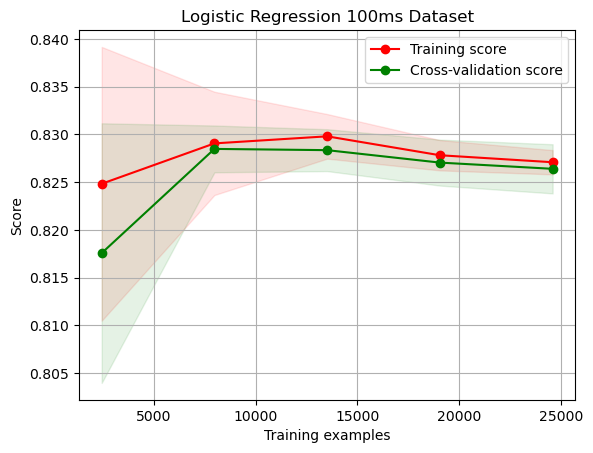

In [44]:
plot_learning_curve(model_100_lr,"Logistic Regression 100ms Dataset",x_mean_2_100_train_scaled, y_2_100_train )

### 500ms

In [45]:
#Perform Logistic Regression on the MFCC mean data
model_500_lr=LogisticRegression(solver="lbfgs", random_state=42)
model_500_lr.fit(x_mean_2_500_train_scaled, y_2_500_train)

LogisticRegression(random_state=42)

In [46]:
# Predict on the test set
y_pred_500_lr = model_500_lr.predict(x_mean_2_500_test_scaled)

In [47]:
from sklearn.metrics import classification_report
# Evaluate the performance
print(classification_report(y_2_500_test, y_pred_500_lr))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3675
           1       0.85      0.85      0.85      4004

    accuracy                           0.84      7679
   macro avg       0.84      0.84      0.84      7679
weighted avg       0.84      0.84      0.84      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

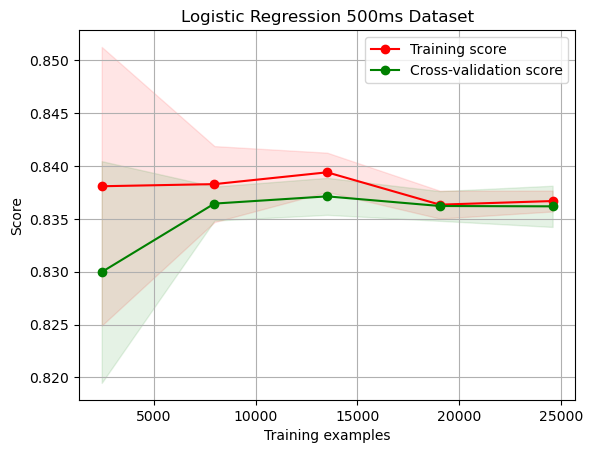

In [48]:
plot_learning_curve(model_500_lr,"Logistic Regression 500ms Dataset",x_mean_2_500_train_scaled, y_2_500_train )

## Linear SVM

### 50ms

In [49]:
from sklearn.svm import LinearSVC

In [50]:
# Create a LinearSVC classifier
svm_50_model = LinearSVC()

# Fit the classifier to the training data
svm_50_model.fit(x_mean_2_50_train_scaled, y_2_50_train)  

# Make predictions on the test data
y_pred_50_svm = svm_50_model.predict(x_mean_2_50_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_50_test, y_pred_50_svm))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3675
           1       0.81      0.85      0.83      4004

    accuracy                           0.82      7679
   macro avg       0.82      0.81      0.81      7679
weighted avg       0.82      0.82      0.82      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

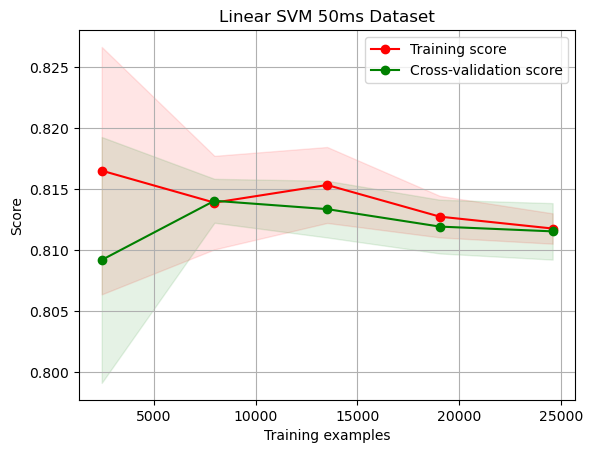

In [51]:
plot_learning_curve(svm_50_model,"Linear SVM 50ms Dataset",x_mean_2_50_train_scaled, y_2_50_train )

### 100ms

In [52]:
# Create a LinearSVC classifier
svm_100_model = LinearSVC()

# Fit the classifier to the training data
svm_100_model.fit(x_mean_2_100_train_scaled, y_2_100_train)  

# Make predictions on the test data
y_pred_100_svm = svm_100_model.predict(x_mean_2_100_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_100_test, y_pred_100_svm))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3675
           1       0.81      0.84      0.83      4004

    accuracy                           0.82      7679
   macro avg       0.82      0.81      0.81      7679
weighted avg       0.82      0.82      0.81      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

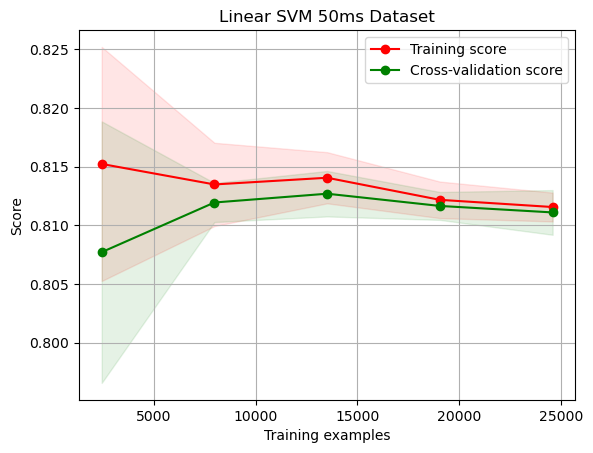

In [53]:
plot_learning_curve(svm_100_model,"Linear SVM 50ms Dataset",x_mean_2_100_train_scaled, y_2_100_train )

### 500ms

In [54]:
# Create a LinearSVC classifier
svm_500_model = LinearSVC()

# Fit the classifier to the training data
svm_500_model.fit(x_mean_2_500_train_scaled, y_2_500_train)  

# Make predictions on the test data
y_pred_500_svm = svm_500_model.predict(x_mean_2_500_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_500_test, y_pred_500_svm))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3675
           1       0.83      0.85      0.84      4004

    accuracy                           0.83      7679
   macro avg       0.83      0.83      0.83      7679
weighted avg       0.83      0.83      0.83      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

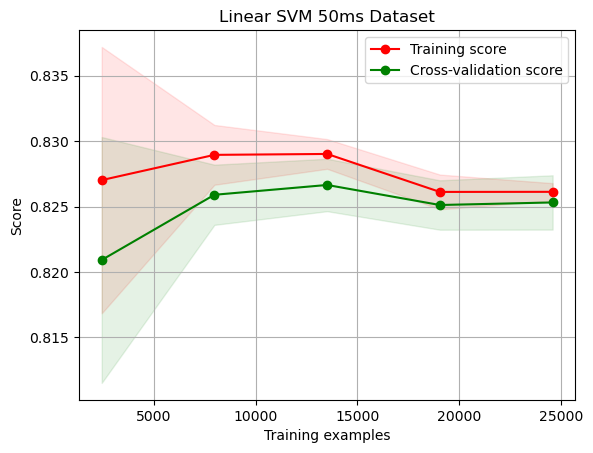

In [55]:
plot_learning_curve(svm_500_model,"Linear SVM 50ms Dataset",x_mean_2_500_train_scaled, y_2_500_train )

### XGBoost

### 50ms

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier
# Create an XGBoost classifier with default hyperparameters
xgb_50_model = XGBClassifier()

# Fit the model to your training data
xgb_50_model.fit(x_mean_2_50_train_scaled, y_2_50_train)

# Make predictions on your test data
y_pred_50_xgb = xgb_50_model.predict(x_mean_2_50_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_50_test, y_pred_50_xgb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3675
           1       0.93      0.95      0.94      4004

    accuracy                           0.94      7679
   macro avg       0.94      0.94      0.94      7679
weighted avg       0.94      0.94      0.94      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

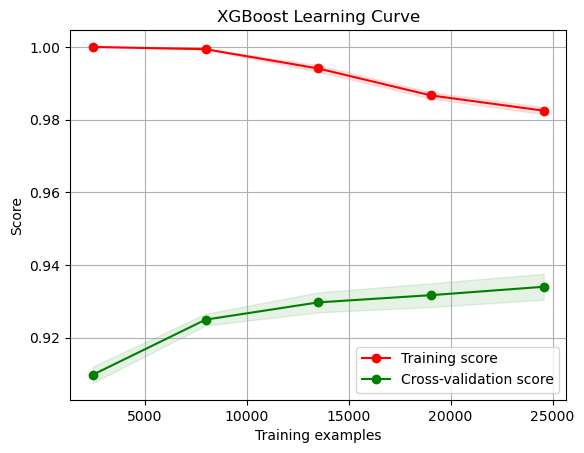

In [58]:
plot_learning_curve(xgb_50_model, "XGBoost Learning Curve", x_mean_2_50_train_scaled, y_2_50_train)

### 100ms

In [59]:
# Create an XGBoost classifier with default hyperparameters
xgb_100_model = XGBClassifier()

# Fit the model to your training data
xgb_100_model.fit(x_mean_2_100_train_scaled, y_2_100_train)

# Make predictions on your test data
y_pred_100_xgb = xgb_100_model.predict(x_mean_2_100_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_100_test, y_pred_100_xgb))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3675
           1       0.93      0.95      0.94      4004

    accuracy                           0.94      7679
   macro avg       0.94      0.94      0.94      7679
weighted avg       0.94      0.94      0.94      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

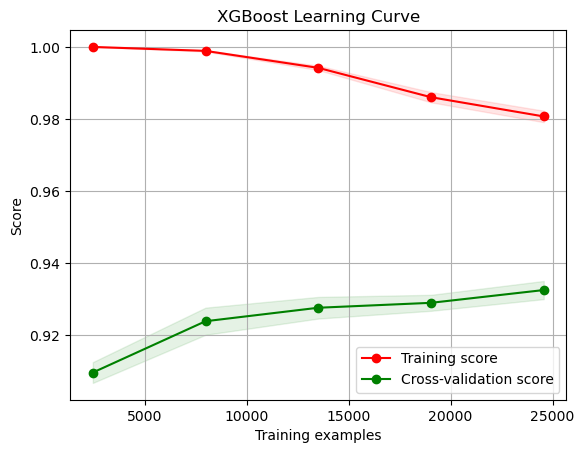

In [60]:
plot_learning_curve(xgb_100_model, "XGBoost Learning Curve", x_mean_2_100_train_scaled, y_2_100_train)

### 500ms

In [62]:
# Create an XGBoost classifier with default hyperparameters
xgb_500_model = XGBClassifier()

# Fit the model to your training data
xgb_500_model.fit(x_mean_2_500_train_scaled, y_2_500_train)

# Make predictions on your test data
y_pred_500_xgb = xgb_500_model.predict(x_mean_2_100_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_500_test, y_pred_500_xgb))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3675
           1       0.93      0.89      0.91      4004

    accuracy                           0.91      7679
   macro avg       0.91      0.91      0.91      7679
weighted avg       0.91      0.91      0.91      7679



<module 'matplotlib.pyplot' from 'C:\\cits5508-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

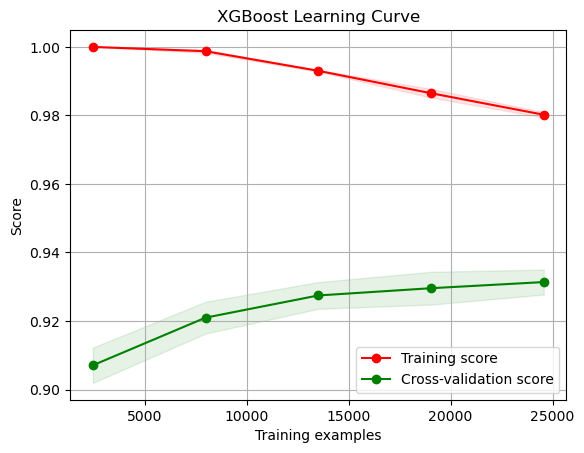

In [63]:
plot_learning_curve(xgb_500_model, "XGBoost Learning Curve", x_mean_2_500_train_scaled, y_2_500_train)

The models' performance reports show that XGBoost perform best compared to others for this binary classification. Next, we will try different dataset input with 4 classes and join with the standard deviation as well

### Mean and standard Deviation Input

### 2 Classes

In [64]:
#x input for the model, all columns
x_ms_50 = df_ms_50_2.iloc[:,1:]

#splitting the data into train and test data
X_ms_2_50_train, X_ms_2_50_test, y_2_50_train, y_2_50_test = train_test_split(x_ms_50, y_2_50, test_size=0.2, random_state=123)

In [65]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_ms_2_50_train_scaled = scaler.fit_transform(X_ms_2_50_train)
x_ms_2_50_test_scaled = scaler.transform(X_ms_2_50_test)

In [66]:
# Create an XGBoost classifier with default hyperparameters
xgb_model_ms_2_50 = XGBClassifier()

# Fit the model to your training data
xgb_model_ms_2_50.fit(x_ms_2_50_train_scaled, y_2_50_train)

# Make predictions on your test data
y_pred_xgb_ms_2_50 = xgb_model_ms_2_50.predict(x_ms_2_50_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_50_test, y_pred_xgb_ms_2_50))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3675
           1       0.95      0.96      0.96      4004

    accuracy                           0.96      7679
   macro avg       0.96      0.95      0.95      7679
weighted avg       0.96      0.96      0.96      7679



The trial of using mean + standard deviation as the input resulting in increasing accuracy for 2%. In this case, we will try for the multiclass model with other dataset: 100ms and 500ms with mean and standard deviation input to  XGBoost Model.

### 4 Classes input

In [67]:
# y input for the model
y_4_50 = df_ms_50['label'].copy()

# Define a mapping from categories to numerical values
label_mapping = {'N': 0, 'S1': 1, 'S2': 2, 'S3': 3, }

# Use the map function to convert the 'label' column
y_4_50 = y_4_50.map(label_mapping)

In [68]:
y_4_50.unique()

array([0, 1, 2, 3], dtype=int64)

In [69]:
#splitting the data into train and test data
X_ms_4_50_train, X_ms_4_50_test, y_4_50_train, y_4_50_test = train_test_split(x_ms_50, y_4_50, test_size=0.2, random_state=123)

In [70]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_ms_4_50_train_scaled = scaler.fit_transform(X_ms_4_50_train)
x_ms_4_50_test_scaled = scaler.transform(X_ms_4_50_test)

In [71]:
# Create an XGBoost classifier with default hyperparameters
xgb_model_ms_4_50 = XGBClassifier()

# Fit the model to your training data
xgb_model_ms_4_50.fit(x_ms_4_50_train_scaled, y_4_50_train)

# Make predictions on your test data
y_pred_xgb_ms_4_50 = xgb_model_ms_4_50.predict(x_ms_4_50_test_scaled)

# Evaluate the model's performance
print(classification_report(y_4_50_test, y_pred_xgb_ms_4_50))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3675
           1       0.94      0.96      0.95      3814
           2       0.79      0.73      0.76       173
           3       0.77      0.59      0.67        17

    accuracy                           0.95      7679
   macro avg       0.87      0.81      0.83      7679
weighted avg       0.95      0.95      0.95      7679



### 100ms

### 2 Classes

In [72]:
# Create a copy of the original DataFrame
df_ms_100_2 = df_ms_100.copy()

In [73]:
# Replace 'S1', 'S2', 'S3' with 'S' in the copied DataFrame
df_ms_100_2['label'].replace(['S1', 'S2', 'S3'], 'S', inplace=True)

In [74]:
df_ms_100_2['label'].unique()

array(['N', 'S'], dtype=object)

In [75]:
#mfcc Mean and Std columns
x_ms_100 = df_ms_100_2.iloc[:,1:]

In [76]:
#variable for the label
y_2_100 = df_ms_100_2.loc[:,'label']

# Convert 'N' to 0 and 'S' to 1
y_2_100 = y_2_100.map({'N': 0, 'S': 1})

In [77]:
#splitting the data into train and test data
X_ms_2_100_train, X_ms_2_100_test, y_2_100_train, y_2_100_test = train_test_split(x_ms_100, y_2_100, test_size=0.2, random_state=123)

In [78]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_ms_2_100_train_scaled = scaler.fit_transform(X_ms_2_100_train)
x_ms_2_100_test_scaled = scaler.transform(X_ms_2_100_test)

In [79]:
# Create an XGBoost classifier with default hyperparameters
xgb_model_ms_2_100 = XGBClassifier()

# Fit the model to your training data
xgb_model_ms_2_100.fit(x_ms_2_100_train_scaled, y_2_100_train)

# Make predictions on your test data
y_pred_xgb_ms_2_100 = xgb_model_ms_2_100.predict(x_ms_2_100_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_100_test, y_pred_xgb_ms_2_100))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3675
           1       0.95      0.97      0.96      4004

    accuracy                           0.96      7679
   macro avg       0.96      0.95      0.96      7679
weighted avg       0.96      0.96      0.96      7679



### 4 Classes

In [80]:
# y input for the model
y_4_100 = df_ms_100['label'].copy()

# Define a mapping from categories to numerical values
label_mapping = {'N': 0, 'S1': 1, 'S2': 2, 'S3': 3, }

# Use the map function to convert the 'label' column
y_4_100 = y_4_100.map(label_mapping)

In [81]:
y_4_100.unique()

array([0, 1, 2, 3], dtype=int64)

In [82]:
#splitting the data into train and test data
X_ms_4_100_train, X_ms_4_100_test, y_4_100_train, y_4_100_test = train_test_split(x_ms_100, y_4_100, test_size=0.2, random_state=123)

In [83]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_ms_4_100_train_scaled = scaler.fit_transform(X_ms_4_100_train)
x_ms_4_100_test_scaled = scaler.transform(X_ms_4_100_test)

In [84]:
# Create an XGBoost classifier with default hyperparameters
xgb_model_ms_4_100 = XGBClassifier()

# Fit the model to your training data
xgb_model_ms_4_100.fit(x_ms_4_100_train_scaled, y_4_100_train)

# Make predictions on your test data
y_pred_xgb_ms_4_100 = xgb_model_ms_4_100.predict(x_ms_4_100_test_scaled)

# Evaluate the model's performance
print(classification_report(y_4_100_test, y_pred_xgb_ms_4_100))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3675
           1       0.94      0.96      0.95      3814
           2       0.75      0.72      0.73       173
           3       0.73      0.47      0.57        17

    accuracy                           0.95      7679
   macro avg       0.85      0.77      0.80      7679
weighted avg       0.95      0.95      0.95      7679



### 500ms

### 2 Classes

In [85]:
# Create a copy of the original DataFrame
df_ms_500_2 = df_ms_500.copy()

In [86]:
# Replace 'S1', 'S2', 'S3' with 'S' in the copied DataFrame
df_ms_500_2['label'].replace(['S1', 'S2', 'S3'], 'S', inplace=True)

In [87]:
df_ms_500_2['label'].unique()

array(['N', 'S'], dtype=object)

In [88]:
#mfcc Mean and Std columns
x_ms_500 = df_ms_500_2.iloc[:,1:]

In [89]:
#variable for the label
y_2_500 = df_ms_500_2.loc[:,'label']

# Convert 'N' to 0 and 'S' to 1
y_2_500 = y_2_500.map({'N': 0, 'S': 1})

In [90]:
#splitting the data into train and test data
X_ms_2_500_train, X_ms_2_500_test, y_2_500_train, y_2_500_test = train_test_split(x_ms_500, y_2_500, test_size=0.2, random_state=123)

In [91]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_ms_2_500_train_scaled = scaler.fit_transform(X_ms_2_500_train)
x_ms_2_500_test_scaled = scaler.transform(X_ms_2_500_test)

In [92]:
# Create an XGBoost classifier with default hyperparameters
xgb_model_ms_2_500 = XGBClassifier()

# Fit the model to your training data
xgb_model_ms_2_500.fit(x_ms_2_500_train_scaled, y_2_500_train)

# Make predictions on your test data
y_pred_xgb_ms_2_500 = xgb_model_ms_2_500.predict(x_ms_2_500_test_scaled)

# Evaluate the model's performance
print(classification_report(y_2_500_test, y_pred_xgb_ms_2_500))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3675
           1       0.95      0.97      0.96      4004

    accuracy                           0.96      7679
   macro avg       0.96      0.96      0.96      7679
weighted avg       0.96      0.96      0.96      7679



### 4 Classes

In [93]:
# y input for the model
y_4_500 = df_ms_500['label'].copy()

# Define a mapping from categories to numerical values
label_mapping = {'N': 0, 'S1': 1, 'S2': 2, 'S3': 3, }

# Use the map function to convert the 'label' column
y_4_500 = y_4_500.map(label_mapping)

In [94]:
y_4_500.unique()

array([0, 1, 2, 3], dtype=int64)

In [95]:
#splitting the data into train and test data
X_ms_4_500_train, X_ms_4_500_test, y_4_500_train, y_4_500_test = train_test_split(x_ms_500, y_4_500, test_size=0.2, random_state=123)

In [96]:
#defining a variable for scaler
scaler = StandardScaler() 

#scalling the value for all features, for the first model we take the mean only as the input
x_ms_4_500_train_scaled = scaler.fit_transform(X_ms_4_500_train)
x_ms_4_500_test_scaled = scaler.transform(X_ms_4_500_test)

In [97]:
# Create an XGBoost classifier with default hyperparameters
xgb_model_ms_4_500 = XGBClassifier()

# Fit the model to your training data
xgb_model_ms_4_500.fit(x_ms_4_500_train_scaled, y_4_500_train)

# Make predictions on your test data
y_pred_xgb_ms_4_500 = xgb_model_ms_4_500.predict(x_ms_4_500_test_scaled)

# Evaluate the model's performance
print(classification_report(y_4_500_test, y_pred_xgb_ms_4_500))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3675
           1       0.94      0.96      0.95      3814
           2       0.77      0.76      0.77       173
           3       0.90      0.53      0.67        17

    accuracy                           0.95      7679
   macro avg       0.89      0.80      0.84      7679
weighted avg       0.95      0.95      0.95      7679



### Save the models and dataset

In [ ]:
import joblib 

### Binary Classification and with mean columns

#### Logistic Regression

#### 50ms

In [ ]:
#Save the test Data for the Logistic Regression model and the Linear SVM model
test_data_mean_50= {'X_test': x_mean_2_50_train_scaled, 'y_test': y_2_50_test}
np.save('ml_test_data_mean_50.npy', test_data_mean_50)
#Save the model
joblib.dump(model_50_lr1, 'lr_50.sav')

#### 100ms

In [ ]:
#Save the test Data for the Logistic Regression model and the Linear SVM model
test_data_mean_100= {'X_test': x_mean_2_100_train_scaled, 'y_test': y_2_100_test}
np.save('ml_test_data_mean_100.npy', test_data_mean_100)
#Save the model
joblib.dump(model_100_lr, 'lr_100.sav')

#### 500ms

In [ ]:
#Save the test Data for the Logistic Regression model and the Linear SVM model
test_data_mean_500= {'X_test': x_mean_2_500_train_scaled, 'y_test': y_2_500_test}
np.save('ml_test_data_mean_500.npy', test_data_mean_500)
#Save the model
joblib.dump(model_500_lr, 'lr_500.sav')

#### Linear SVM

#### 50ms

In [ ]:
#Save the model
joblib.dump(svm_50_model, 'svm_50.sav')

#### 100ms

In [ ]:
#Save the model
joblib.dump(svm_100_model, 'svm_100.sav')

#### 500ms

In [ ]:
#Save the model
joblib.dump(svm_500_model, 'svm_500.sav')

#### XGBoost

#### 50ms

In [ ]:
#Save the model
joblib.dump(xgb_50_model, 'xgb_50.sav')

#### 100ms

In [ ]:
#Save the model
joblib.dump(xgb_100_model, 'xgb_100.sav')

#### 500ms

In [ ]:
#Save the model
joblib.dump(xgb_500_model, 'xgb_500.sav')

### XGBoost 2 Classes, Mean and Standard Deviation Columns

#### 50 ms

In [ ]:
#Save the test Data
test_data_2_50= {'X_test': x_ms_2_50_test_scaled, 'y_test': y_2_50_test}
np.save('ml_test_data_2_50.npy', test_data_2_50)
#Save the model
joblib.dump(xgb_model_ms_2_50, 'ml_2_50.sav')

#### 100 ms

In [ ]:
#Save the test Data
test_data_2_100= {'X_test': x_ms_2_100_test_scaled, 'y_test': y_2_100_test}
np.save('ml_test_data_2_100.npy', test_data_2_100)
#Save the model
joblib.dump(xgb_model_ms_2_100, 'ml_2_100.sav')

#### 500 ms

In [ ]:
#Save the test Data
test_data_2_500= {'X_test': x_ms_2_500_test_scaled, 'y_test': y_2_500_test}
np.save('ml_test_data_2_500.npy', test_data_2_500)
#Save the model
joblib.dump(xgb_model_ms_2_500, 'ml_2_500.sav')

### XGBoost 4 Classes, Mean and Standard Deviation Columns

#### 50 ms

In [ ]:
#Save the test Data
test_data_4_50= {'X_test': x_ms_4_50_test_scaled, 'y_test': y_4_50_test}
np.save('ml_test_data_4_50.npy', test_data_4_50)
#Save the model
joblib.dump(xgb_model_ms_4_50, 'ml_4_50.sav')

#### 100 ms

In [ ]:
#Save the test Data
test_data_4_100= {'X_test': x_ms_4_100_test_scaled, 'y_test': y_4_100_test}
np.save('ml_test_data_4_100.npy', test_data_4_100)
#Save the model
joblib.dump(xgb_model_ms_4_100, 'ml_4_100.sav')

#### 500 ms

In [ ]:
#Save the test Data
test_data_4_500= {'X_test': x_ms_4_500_test_scaled, 'y_test': y_4_500_test}
np.save('ml_test_data_4_500.npy', test_data_4_500)
#Save the model
joblib.dump(xgb_model_ms_4_500, 'ml_4_500.sav')